In [15]:
#Hey this project is my second project for my internship as a machine learning dev for codealpha , i'm mehdi dinari and i hope that you will like that !

## Import Modules

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

## Load the Dataset

In [17]:
import os

paths = []
labels = []
directory = r"C:\Users\Fddkk\PycharmProjects\Emotion\emotions"  # Use the provided Windows path

for dirname, _, filenames in os.walk(directory):
    for filename in filenames:
        file_path = os.path.join(dirname, filename)
        paths.append(file_path)
        # Extract label from the filename based on the underscore delimiter
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break

print('Dataset is Loaded')


Dataset is Loaded


In [18]:
len(paths)

2800

In [19]:
paths[:5]

['C:\\Users\\Fddkk\\PycharmProjects\\Emotion\\emotions\\OAF_angry\\OAF_back_angry.wav',
 'C:\\Users\\Fddkk\\PycharmProjects\\Emotion\\emotions\\OAF_angry\\OAF_bar_angry.wav',
 'C:\\Users\\Fddkk\\PycharmProjects\\Emotion\\emotions\\OAF_angry\\OAF_base_angry.wav',
 'C:\\Users\\Fddkk\\PycharmProjects\\Emotion\\emotions\\OAF_angry\\OAF_bath_angry.wav',
 'C:\\Users\\Fddkk\\PycharmProjects\\Emotion\\emotions\\OAF_angry\\OAF_bean_angry.wav']

In [20]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [21]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,C:\Users\Fddkk\PycharmProjects\Emotion\emotion...,angry
1,C:\Users\Fddkk\PycharmProjects\Emotion\emotion...,angry
2,C:\Users\Fddkk\PycharmProjects\Emotion\emotion...,angry
3,C:\Users\Fddkk\PycharmProjects\Emotion\emotion...,angry
4,C:\Users\Fddkk\PycharmProjects\Emotion\emotion...,angry


In [22]:
df['label'].value_counts()

label
angry      400
disgust    400
fear       400
happy      400
neutral    400
ps         400
sad        400
Name: count, dtype: int64

## Exploratory Data Analysis

<Axes: xlabel='label', ylabel='count'>

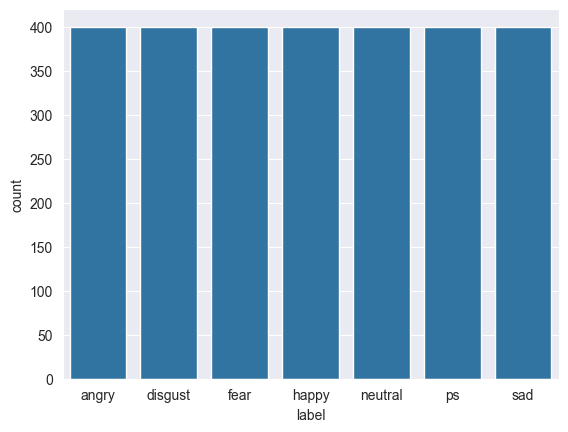

In [23]:
sns.countplot(data=df, x='label')

In [24]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

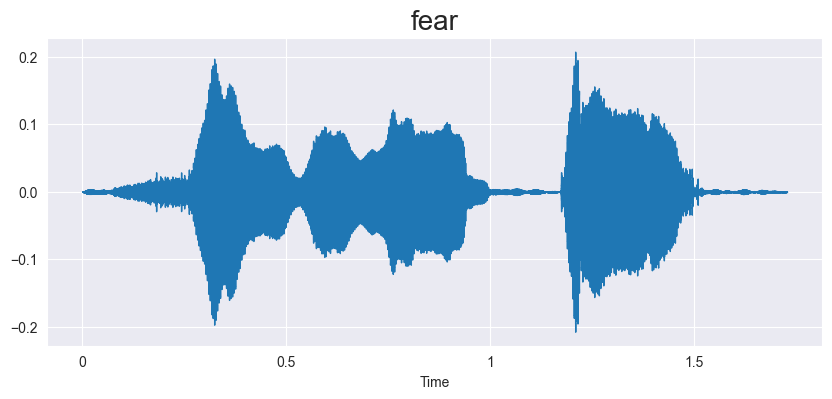

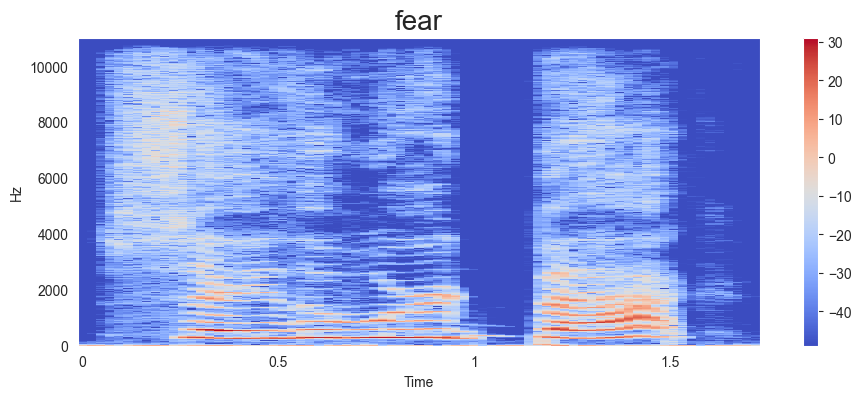

In [25]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

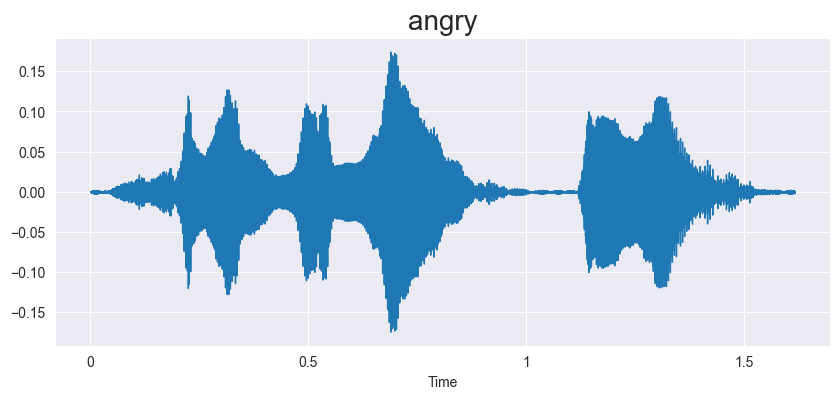

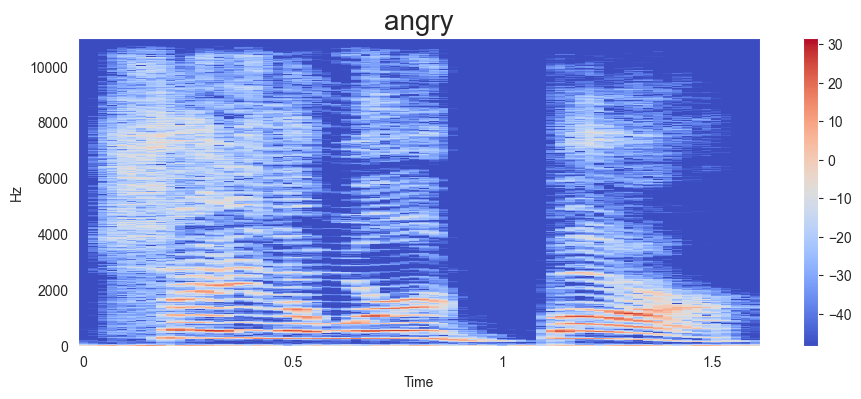

In [26]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

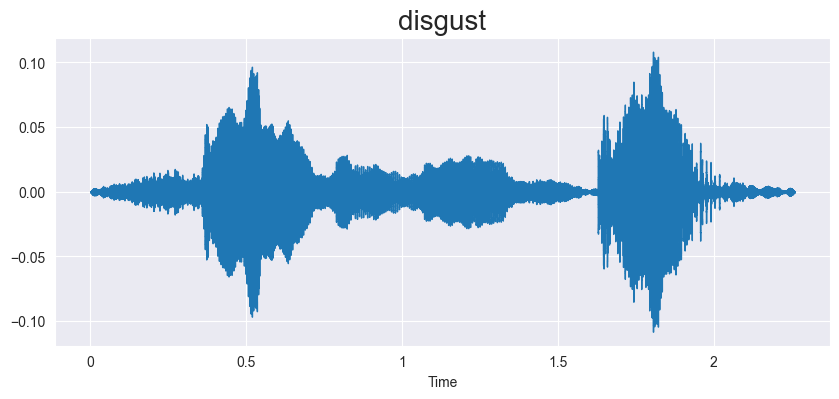

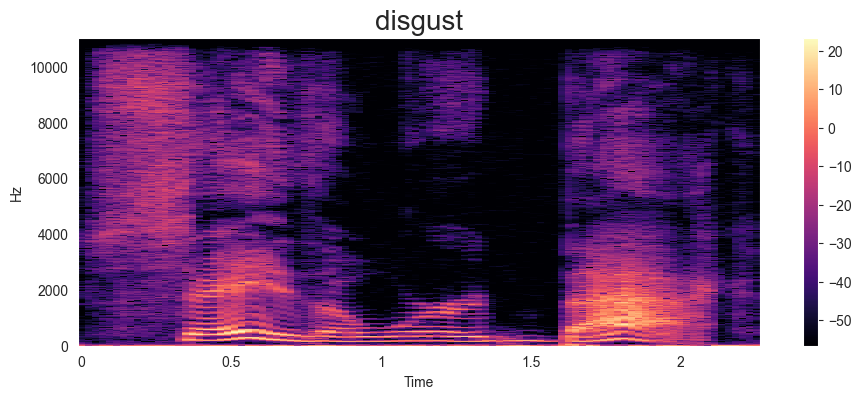

In [27]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

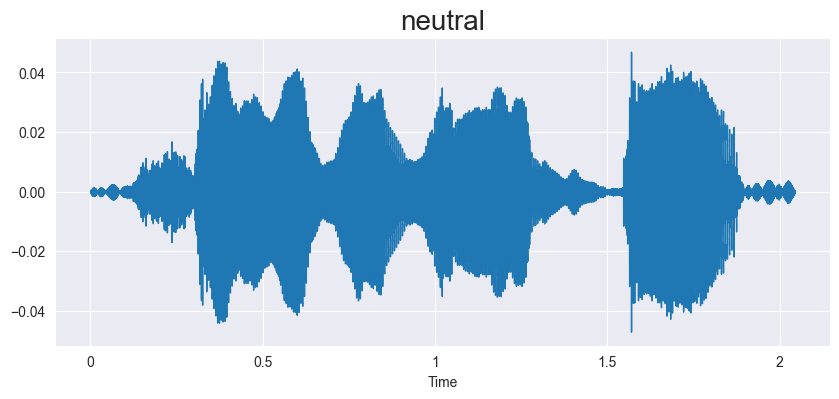

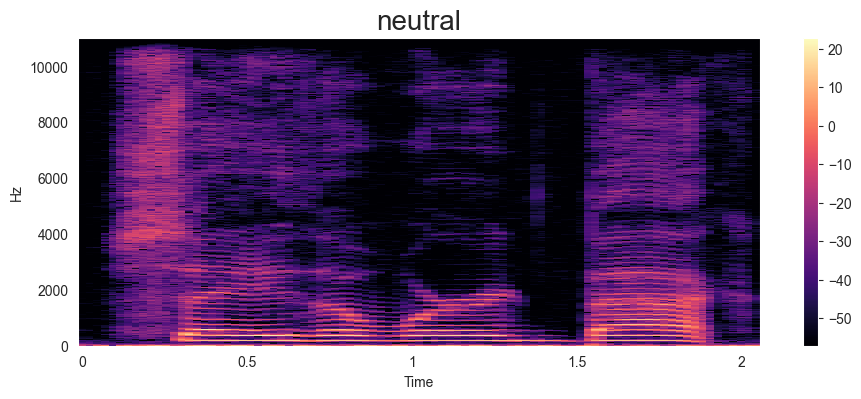

In [28]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

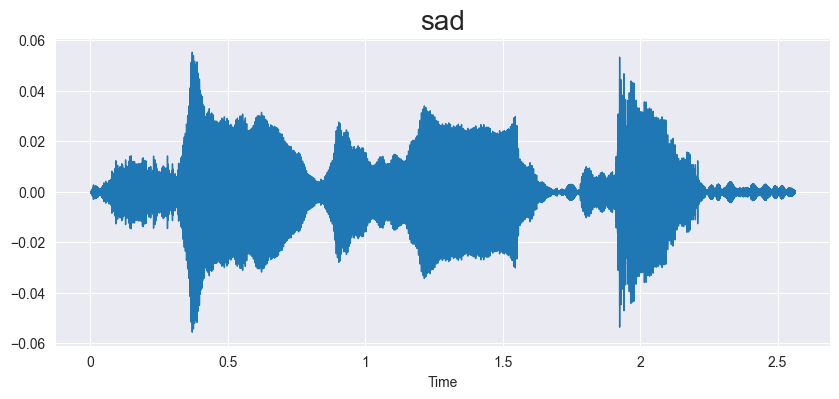

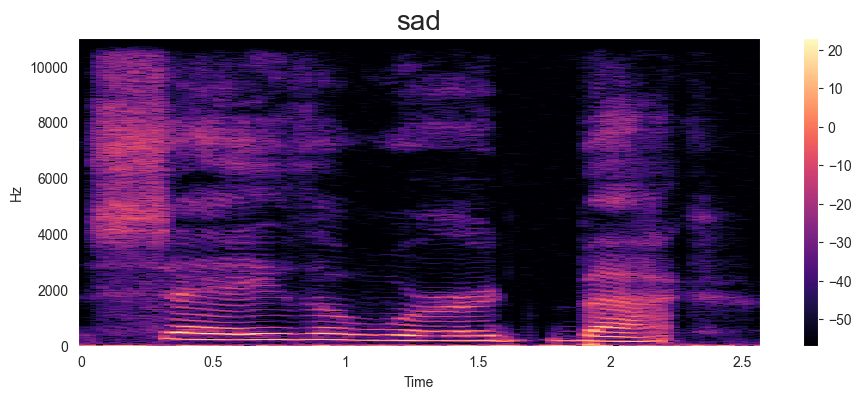

In [29]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

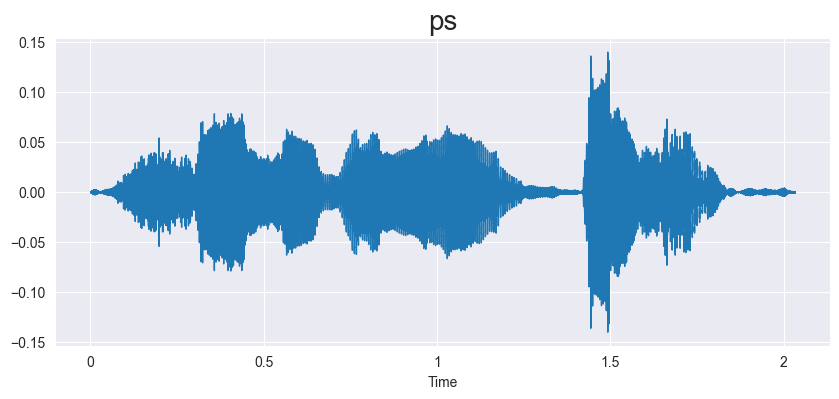

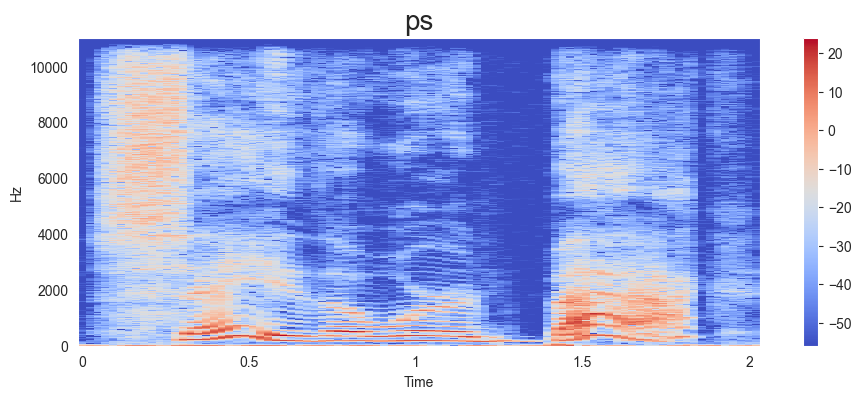

In [30]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

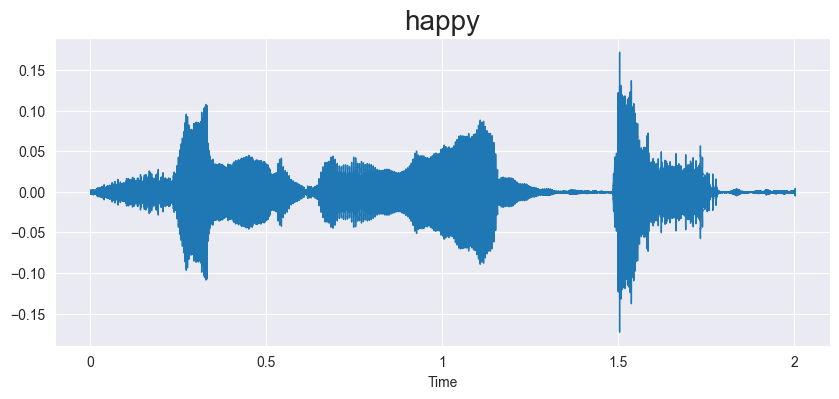

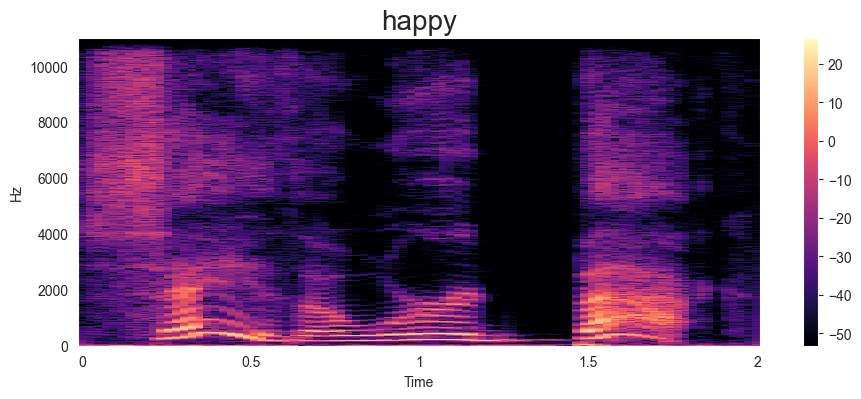

In [31]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

## Feature Extraction

In [32]:
import librosa.feature  # Explicit import

def extract_mfcc(filename):
    Y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=Y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [33]:
extract_mfcc(df['speech'][0])

array([-3.9698621e+02,  7.7440536e+01, -1.9592791e+01, -2.1666689e+01,
       -2.1127560e+00,  1.0075363e+01, -2.0366707e+01, -6.0924492e+00,
       -7.2122831e+00, -5.5736625e-01, -1.8325533e+00,  2.0210145e-01,
        7.2755075e-01,  1.3177377e+00,  2.8863375e+00,  2.8557906e+00,
       -4.7129216e+00, -4.4365110e+00, -1.6211592e+00, -1.0239839e+01,
       -7.5512629e+00, -1.7968802e+00, -7.0376525e+00,  9.4365845e+00,
        8.3558550e+00,  2.1712360e+01,  1.9216991e+01,  2.0348930e+01,
        1.3413366e+01,  8.3391724e+00,  3.9472228e-01,  5.1113148e+00,
        9.5687389e+00,  5.4548683e+00,  2.5099638e+00, -1.8239073e+00,
        4.8689618e+00,  9.3139238e+00,  2.0891502e+00, -1.9064914e+00],
      dtype=float32)

In [34]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [35]:
X_mfcc

0       [-396.9862, 77.44054, -19.59279, -21.666689, -...
1       [-465.73267, 98.77373, 0.6560086, -32.74544, -...
2       [-429.79196, 46.12401, 1.5550478, -0.21709442,...
3       [-403.46118, 76.32369, -12.531775, -22.288858,...
4       [-434.05756, 77.4455, 10.865501, 16.092945, 8....
                              ...                        
2795    [-406.48053, 80.379875, 32.462395, 46.579094, ...
2796    [-426.90918, 102.54756, 24.800041, 43.048096, ...
2797    [-378.50494, 80.91062, 35.300533, 39.74792, -4...
2798    [-434.8618, 89.906364, 28.373262, 39.577065, -...
2799    [-421.8341, 70.69788, 32.476387, 45.642555, 4....
Name: speech, Length: 2800, dtype: object

In [36]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [37]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [38]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [39]:
y = y.toarray()

In [40]:
y.shape

(2800, 7)

## Create the LSTM Model

In [41]:
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.models import Model

# Define the model architecture using Functional API
input_layer = Input(shape=(40, 1))  # Explicit input shape
x = LSTM(256, return_sequences=False)(input_layer)
x = Dropout(0.2)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
output_layer = Dense(7, activation='softmax')(x)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile and summarize (unchanged from original)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 40, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 256)            │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.4102 - loss: 1.5051 - val_accuracy: 0.2875 - val_loss: 2.4934
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.7832 - loss: 0.5717 - val_accuracy: 0.4929 - val_loss: 1.4993
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.8991 - loss: 0.2953 - val_accuracy: 0.5357 - val_loss: 2.4817
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9316 - loss: 0.2188 - val_accuracy: 0.4107 - val_loss: 2.1333
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9501 - loss: 0.1545 - val_accuracy: 0.5018 - val_loss: 2.6029
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9373 - loss: 0.1945 - val_accuracy: 0.4982 - val_loss: 1.7123
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9667 - loss: 0.1039 - val_accuracy: 0.6054 - val_loss: 2.3537
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.9596 - loss: 0.1402 - val_accuracy: 0.4393 - v

In [43]:
# best val accuracy: 72.32
# use checkpoint to save the best val accuracy model
# adjust learning rate for slow convergence

## Plot the results

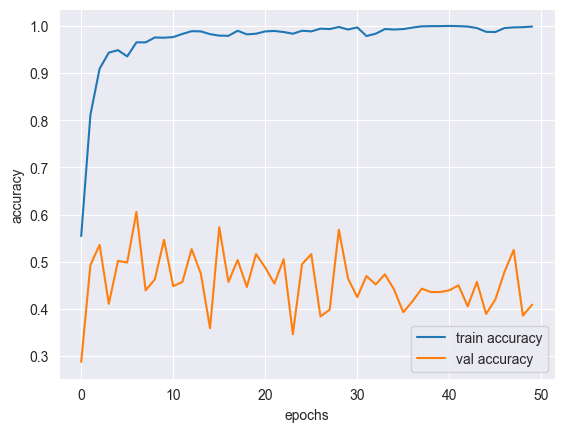

In [44]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

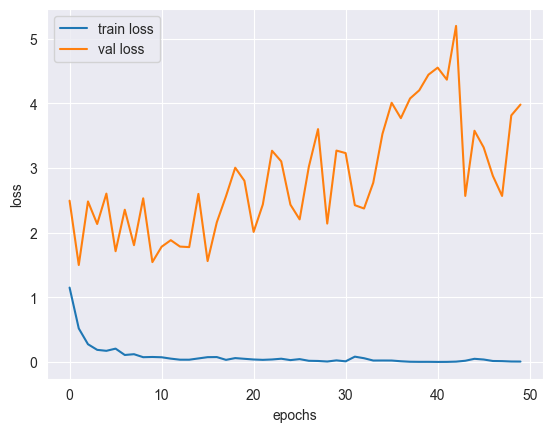

In [45]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()